In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# import some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the wine dataset from URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=';')

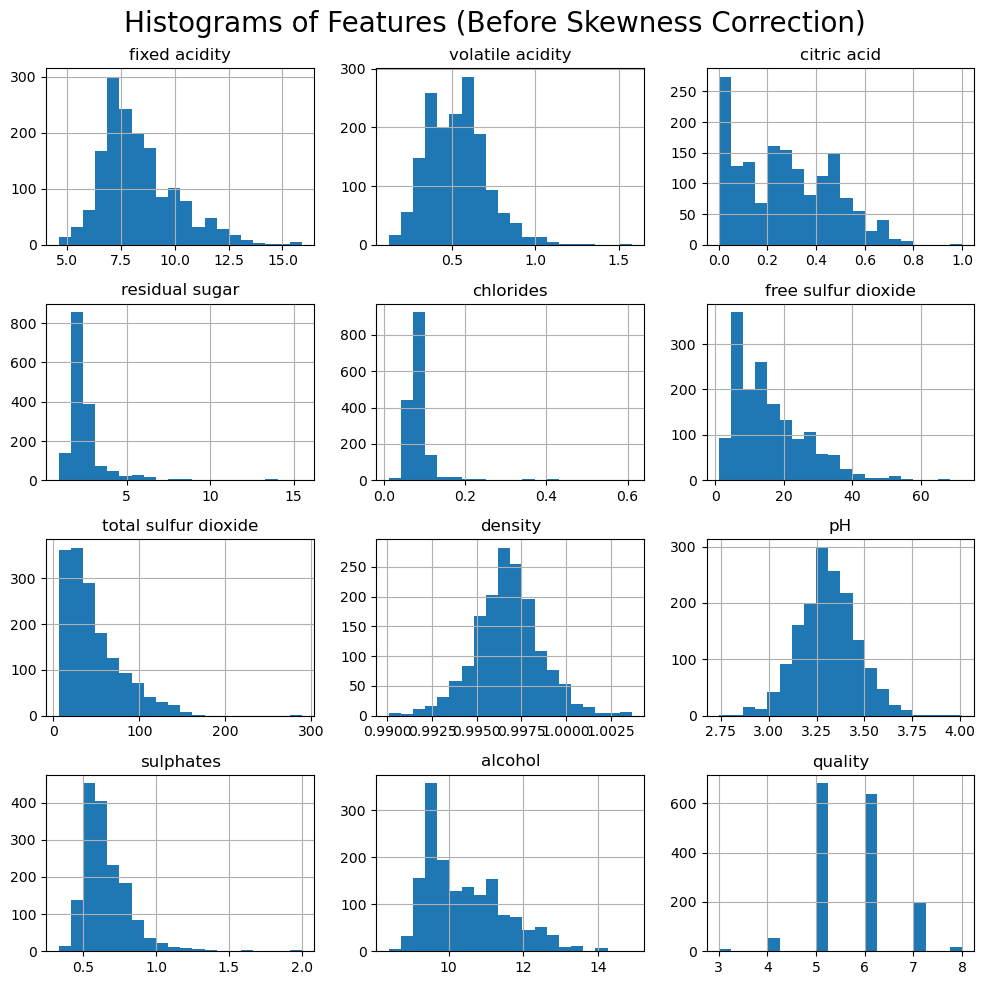

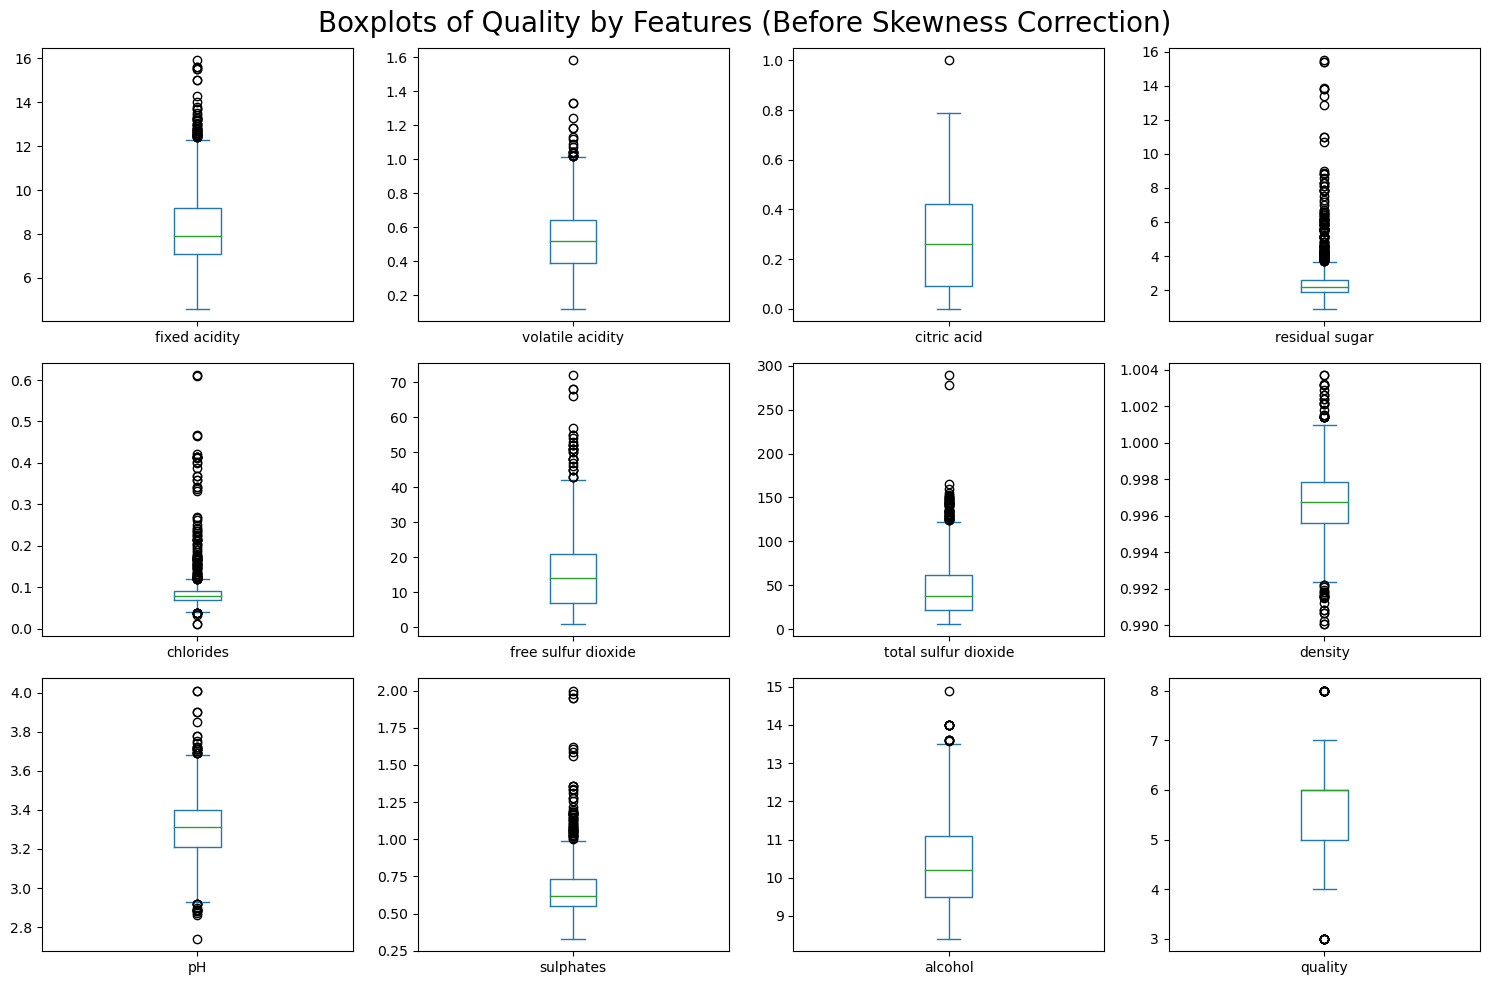

In [4]:
# Exploratory Data Analysis

# Histograms of features before correcting for skewness
wine_data.hist(figsize=(10,10), bins=20)
plt.suptitle("Histograms of Features (Before Skewness Correction)", fontsize=20)
plt.tight_layout()
plt.show()

# Box plots of quality by different features before correcting for skewness
wine_data.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.suptitle("Boxplots of Quality by Features (Before Skewness Correction)", fontsize=20)
plt.tight_layout()
plt.show()

In [5]:
# Check for skewness in the data
skewed_features = wine_data.apply(lambda x: x.skew())
skewed_features = skewed_features[abs(skewed_features) > 0.5]
print('Skewed features:')
print(skewed_features)

# Correct for skewness in the data
for feature in skewed_features.index:
    wine_data[feature] = np.log1p(wine_data[feature])

Skewed features:
fixed acidity           0.982751
volatile acidity        0.671593
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
alcohol                 0.860829
dtype: float64


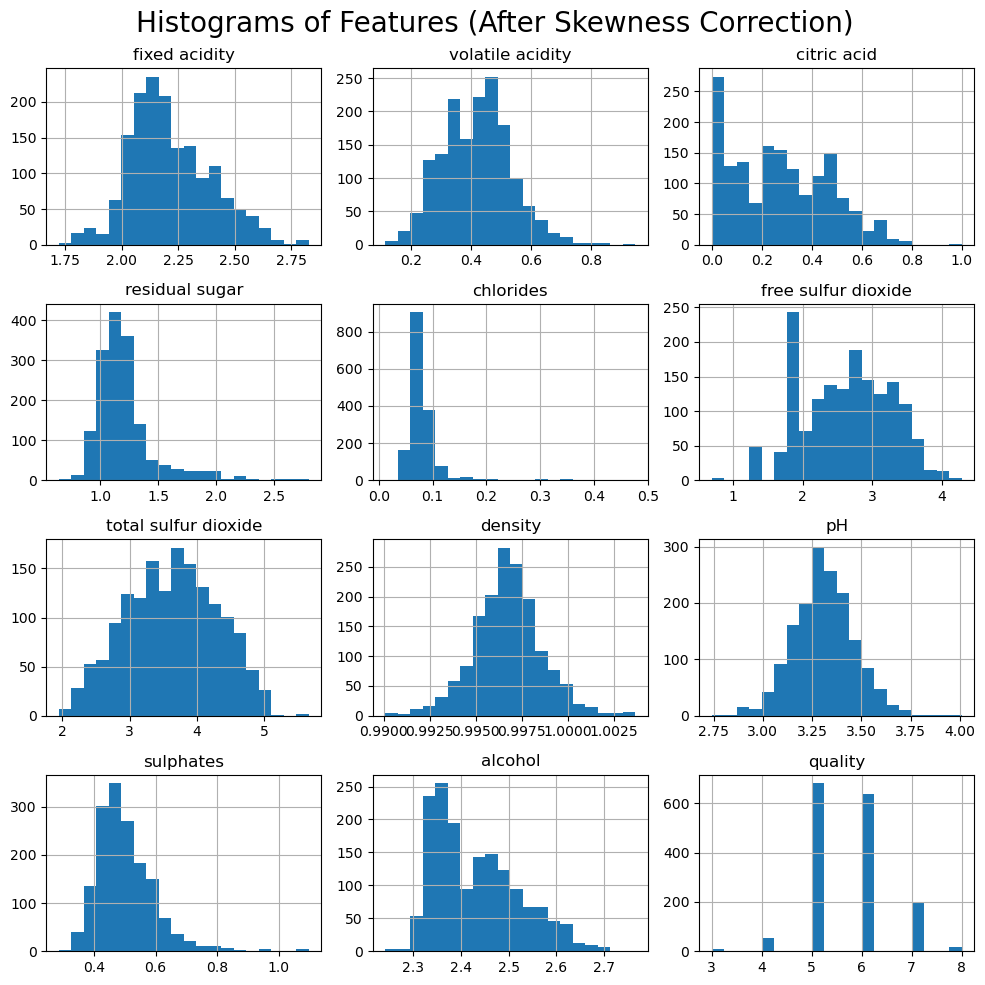

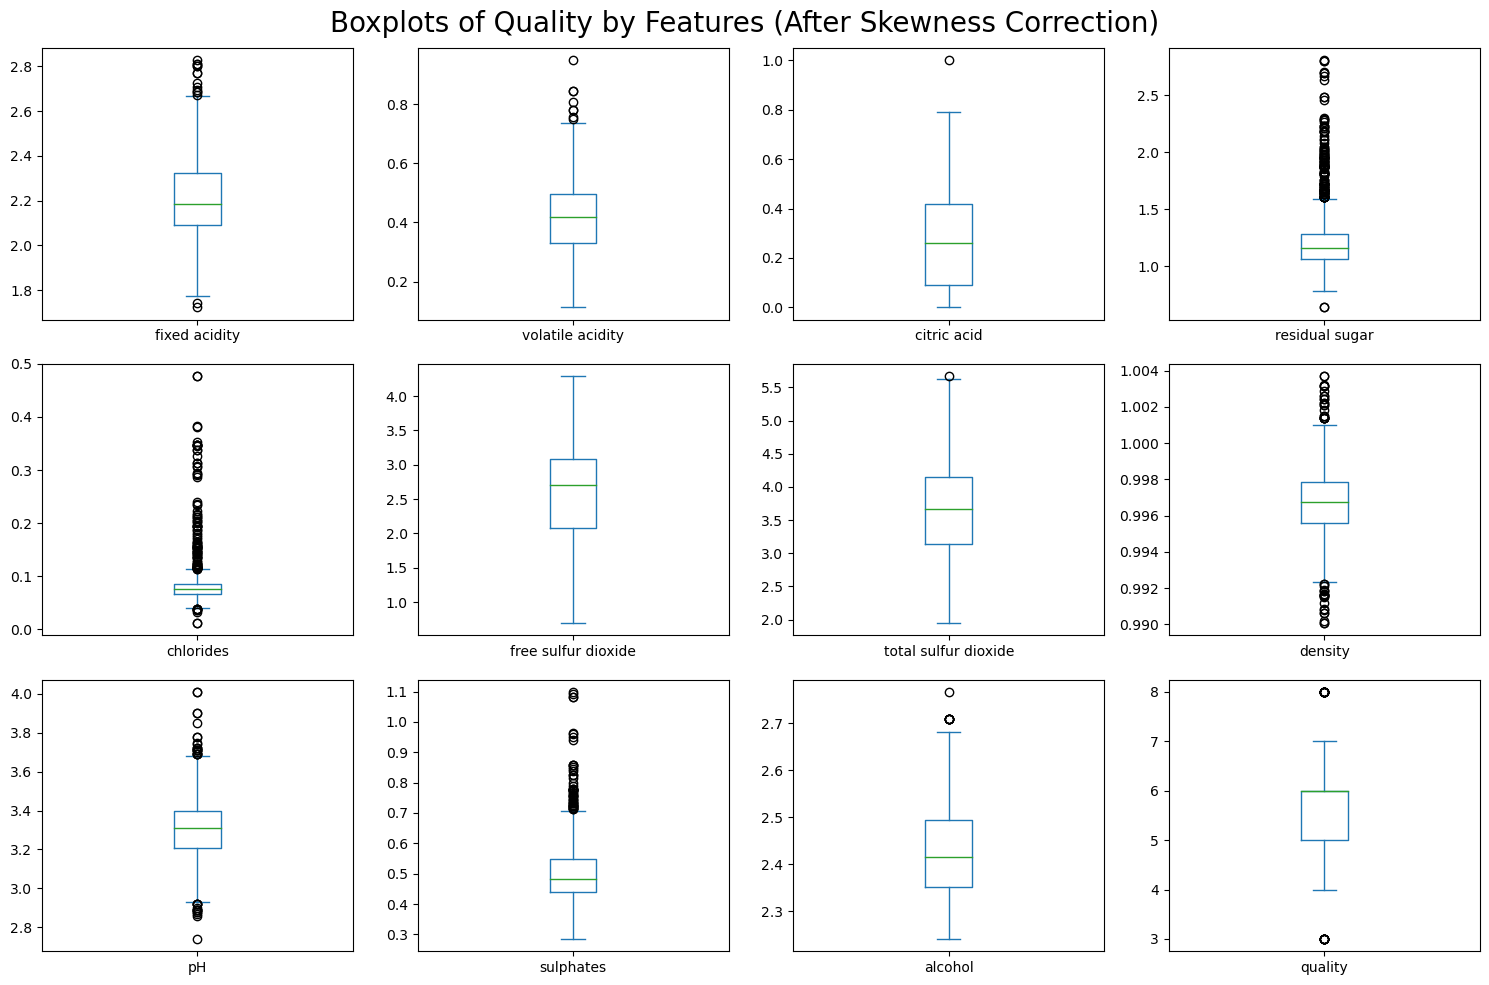

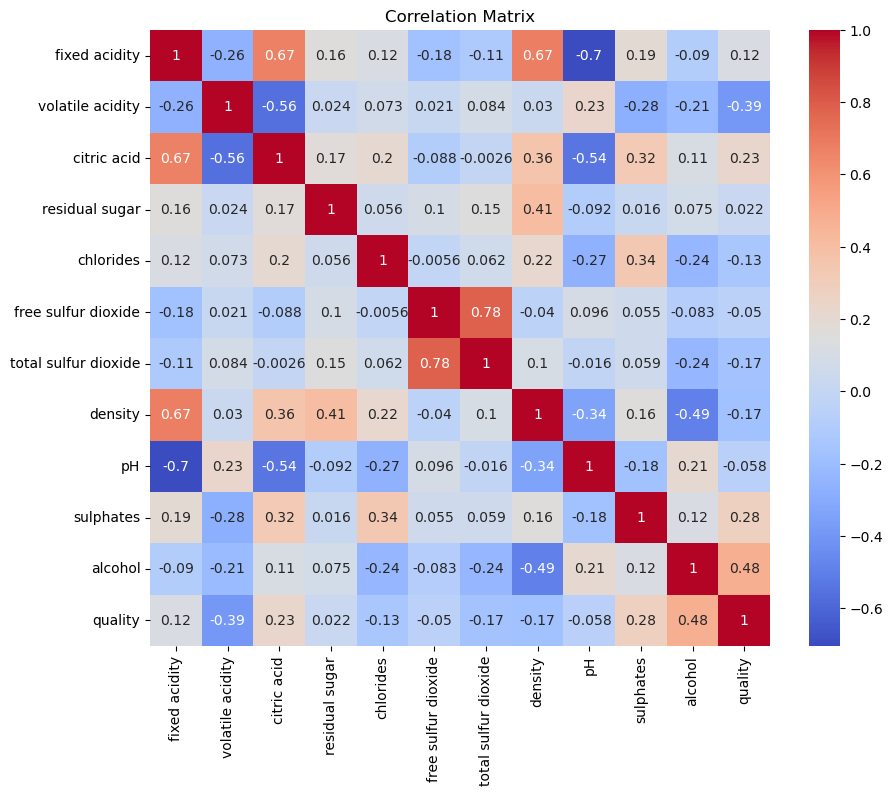

In [6]:
# Histograms of features after correcting for skewness
wine_data.hist(figsize=(10,10), bins=20)
plt.suptitle("Histograms of Features (After Skewness Correction)", fontsize=20)
plt.tight_layout()
plt.show()

# Box plots of quality by different features after correcting for skewness
wine_data.plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.suptitle("Boxplots of Quality by Features (After Skewness Correction)", fontsize=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = wine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data.drop('quality', axis=1),
                                                    wine_data['quality'],
                                                    test_size=0.2,
                                                    random_state=42)

# Train a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')



Mean Squared Error: 0.30
R^2 Score: 0.54


In [8]:
# Predict the quality of new wines
new_wine = [[7.2, 0.36, 0.46, 2.1, 0.078, 29, 63, 0.9978, 3.35, 0.65, 9.9]]
new_quality = rf.predict(new_wine)[0]
print(f'Predicted quality of new wine: {new_quality:.2f}')

Predicted quality of new wine: 6.27
